## **Normalization**
Normalization is a process used in machine learning and data processing to scale data into a specific range, usually between 0 and 1. The goal is to make all features (columns) in the dataset contribute equally to the model and avoid features with larger values dominating other

### **Types**
- MinMaxScaling
- Mean normalization
- Max absolute scaling
- Robust scaling

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **MinMaxScaling**

X
scaled
​
 = X−min(X)/
max(X)−min(X)

​
range between 0 to 1.



In [7]:
df = pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])
df.columns = ['Class label','Alcohol','Malic acid']
df.sample(10)

,Class label,Alcohol,Malic acid
72,2,13.49,1.66
50,1,13.05,1.73
1,1,13.20,1.78
139,3,12.84,2.96
126,2,12.43,1.53
116,2,11.82,1.47
69,2,12.21,1.19
68,2,13.34,0.94
89,2,12.08,1.33
109,2,11.61,1.35


In [5]:
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<Axes: xlabel='Alcohol', ylabel='Density'>

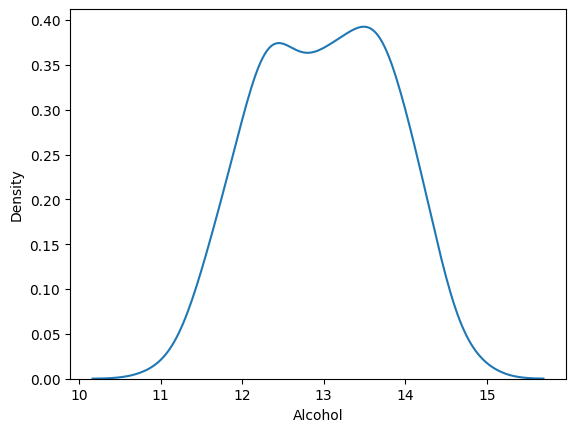

In [9]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

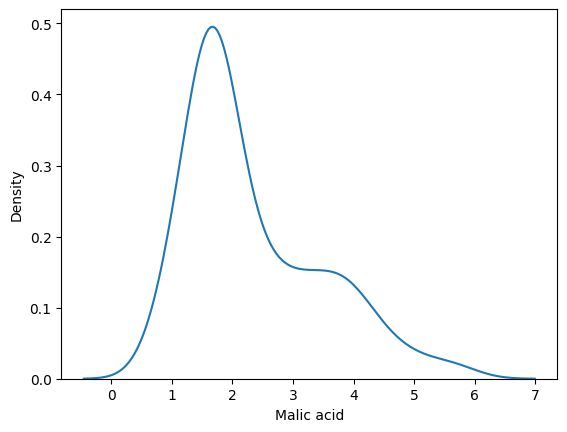

In [10]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

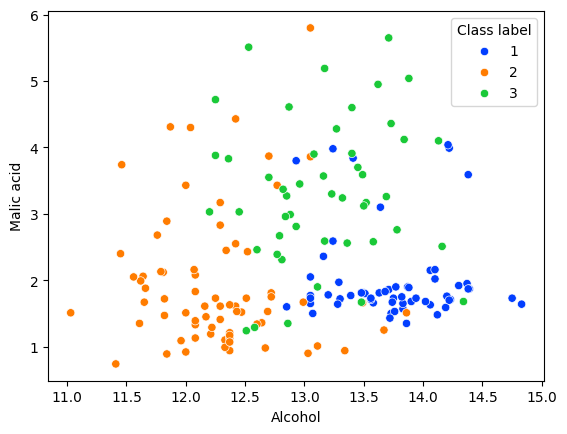

In [12]:
sns.scatterplot(data=df,x='Alcohol',y='Malic acid',hue='Class label',palette='bright')

In [13]:
from re import X
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=['Alcohol','Malic acid'])
X_test_scaled = pd.DataFrame(X_test_scaled,columns=['Alcohol','Malic acid'])

In [19]:
np.round(X_train_scaled.describe(),1
         )

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [20]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


Text(0.5, 1.0, 'After Scaling')

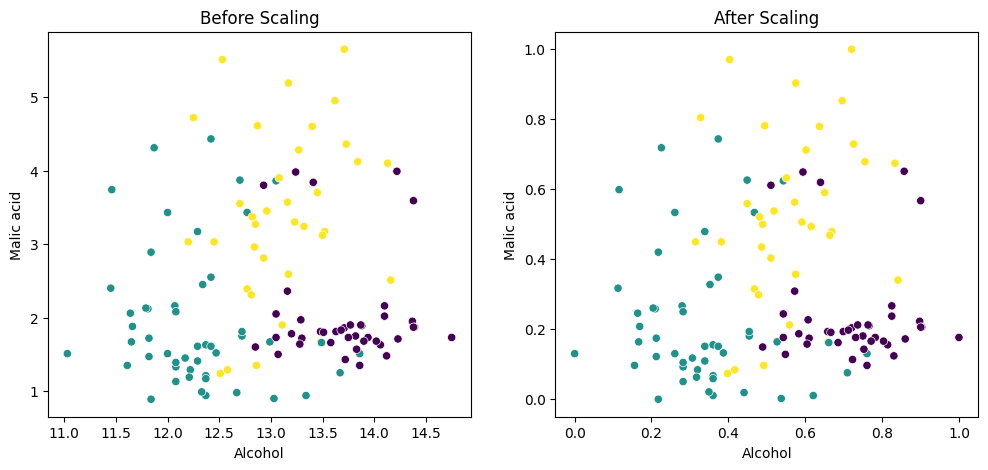

In [23]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.scatterplot(data=X_train,x='Alcohol',y='Malic acid',ax=ax1,c =y_train )
ax1.set_title('Before Scaling')

sns.scatterplot(data=X_train_scaled,x='Alcohol',y='Malic acid',ax=ax2,c=y_train)
ax2.set_title('After Scaling')

<Axes: xlabel='Alcohol', ylabel='Density'>

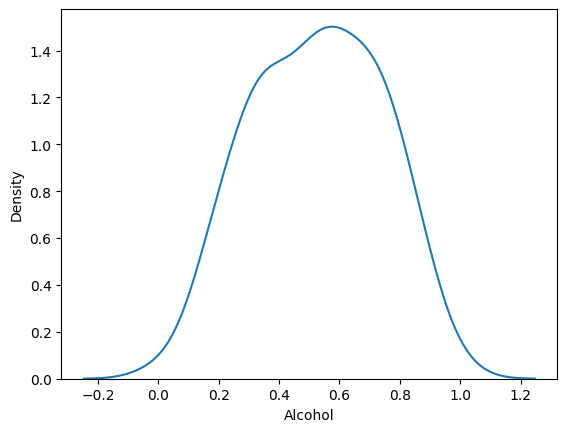

In [24]:
sns.kdeplot(X_train_scaled['Alcohol'])

Text(0.5, 1.0, 'After Scaling')

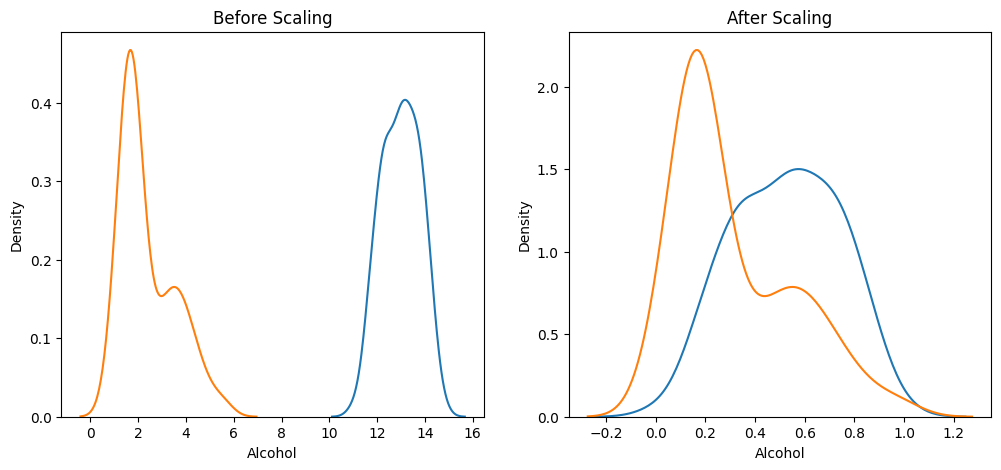

In [26]:
fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)
ax1.set_title('Before Scaling')


sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
ax2.set_title('After Scaling')

### **Mean Normalization**

X
normalized
​
 = X−mean(X) /
max(X)−min(X)

​range lies between -1 to 1.

similar to standardization.
no class in sci-kit

### **MaxAbsScaling**

X
scaled
​
 = X/
max(∣X∣)

​  
- use for sparse matrix.



### **Robust Scaling**

X
scaled
​
 = X−median(X) /
IQR

​Robust to outliers, generally perform on if dataset have outliers.



### **Normalization Vs Standardization**

do we need the scaling.
- best is standardization.
- Normalization used only when we already know about the min and max values